In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, skewtest, kurtosis, kurtosistest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, r2_score

In [7]:
all_data = pd.read_csv('/Users/mattomalley/Ames-Housing-Price-Prediction/data/raw/train.csv')

all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Performing EDA on the following columns based on general intuition--will examine more columns in later stages.

 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 '2ndFlrSF',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'SalePrice'

In [8]:
cols = [ 
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 '2ndFlrSF',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'SalePrice']

df = all_data[cols]

df.head()


,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,SalePrice
0,CollgCr,1Fam,2Story,7,5,2003,2003,856,854,2,1,3,208500
1,Veenker,1Fam,1Story,6,8,1976,1976,1262,0,2,0,3,181500
2,CollgCr,1Fam,2Story,7,5,2001,2002,920,866,2,1,3,223500
3,Crawfor,1Fam,2Story,7,5,1915,1970,961,756,1,0,3,140000
4,NoRidge,1Fam,2Story,8,5,2000,2000,1145,1053,2,1,4,250000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Neighborhood  1460 non-null   object
 1   BldgType      1460 non-null   object
 2   HouseStyle    1460 non-null   object
 3   OverallQual   1460 non-null   int64 
 4   OverallCond   1460 non-null   int64 
 5   YearBuilt     1460 non-null   int64 
 6   YearRemodAdd  1460 non-null   int64 
 7   1stFlrSF      1460 non-null   int64 
 8   2ndFlrSF      1460 non-null   int64 
 9   FullBath      1460 non-null   int64 
 10  HalfBath      1460 non-null   int64 
 11  BedroomAbvGr  1460 non-null   int64 
 12  SalePrice     1460 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 148.4+ KB


Exploring target first --> SalePrice

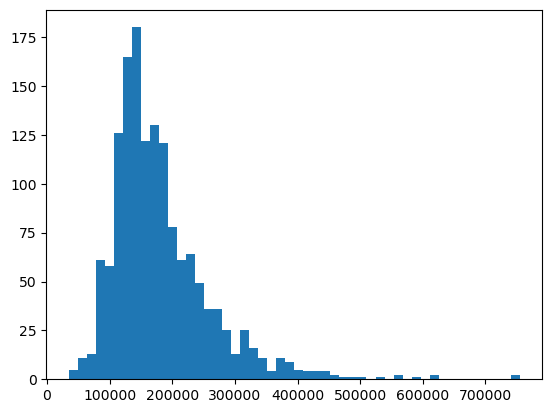

In [24]:
# Distribution of SalePrice

price = df['SalePrice']

plt.hist(price, bins=50)
plt.show()

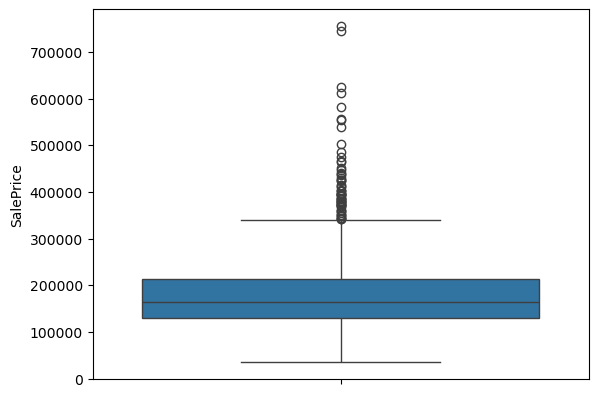

In [25]:
# Boxplot

sns.boxplot(price)

plt.show()

In [26]:
# Summary statistics

price.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [21]:
# Skewness

s = skew(price)
zscore, pvalue = skewtest(price)

print(f"Skewness: {s:.3f}, z-score: {zscore:.3f}, p-value: {pvalue:.3f}")

Skewness: 1.881, z-score: 20.184, p-value: 0.000


In [22]:
# Kurtosis

k = kurtosis(price)
zscore, pvalue = kurtosistest(price)

print(f"Kurtosis: {k:.3f}, z-score: {zscore:.3f}, p-value: {pvalue:.3f}")

Kurtosis: 6.510, z-score: 14.263, p-value: 0.000


Exploring log transformation

In [28]:
# Log transformation

log_price = np.log(price)

In [29]:
s = skew(log_price)
zscore, pvalue = skewtest(log_price)

print(f"Skewness: {s:.3f}, z-score: {zscore:.3f}, p-value: {pvalue:.3f}")

k = kurtosis(log_price)
zscore, pvalue = kurtosistest(log_price)

print(f"Kurtosis: {k:.3f}, z-score: {zscore:.3f}, p-value: {pvalue:.3f}")

Skewness: 0.121, z-score: 1.894, p-value: 0.058
Kurtosis: 0.803, z-score: 4.682, p-value: 0.000


Exploring features

In [10]:
df['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

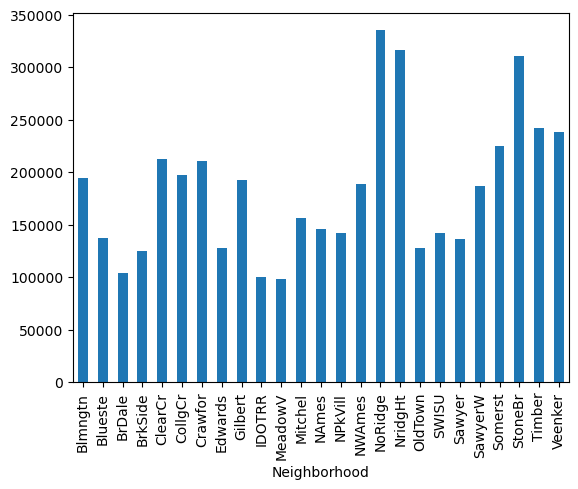

In [14]:
df.groupby('Neighborhood')['SalePrice'].mean().plot(kind='bar')
plt.show()

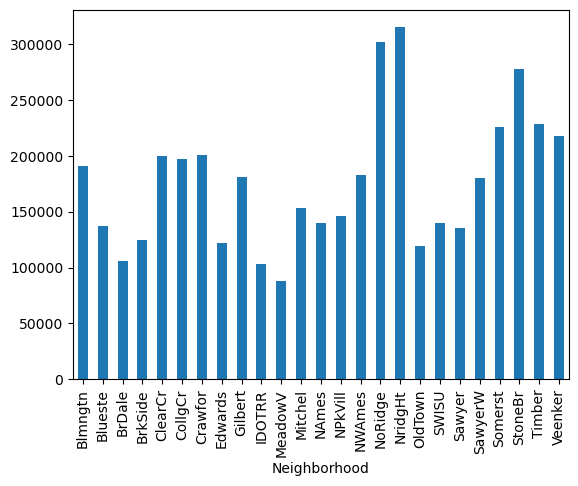

In [15]:
df.groupby('Neighborhood')['SalePrice'].median().plot(kind='bar')
plt.show()